In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create a simple synthetic dataset (size only for simplicity)
data = {
    'Size_sqft': [850, 900, 1200, 1500, 2000, 2500, 3000, 3500],
    'Bedrooms': [2, 2, 3, 3, 4, 4, 5, 5],
    'Age_years': [10, 8, 5, 3, 2, 1, 4, 2],
    'Price': [120000, 130000, 180000, 230000, 280000, 350000, 400000, 450000]
}

df = pd.DataFrame(data)
df


,Size_sqft,Bedrooms,Age_years,Price
0,850,2,10,120000
1,900,2,8,130000
2,1200,3,5,180000
3,1500,3,3,230000
4,2000,4,2,280000
5,2500,4,1,350000
6,3000,5,4,400000
7,3500,5,2,450000


        Size_sqft  Bedrooms  Age_years          Price
count     8.00000  8.000000   8.000000       8.000000
mean   1931.25000  3.500000   4.375000  267500.000000
std     991.72919  1.195229   3.159453  123952.755977
min     850.00000  2.000000   1.000000  120000.000000
25%    1125.00000  2.750000   2.000000  167500.000000
50%    1750.00000  3.500000   3.500000  255000.000000
75%    2625.00000  4.250000   5.750000  362500.000000
max    3500.00000  5.000000  10.000000  450000.000000


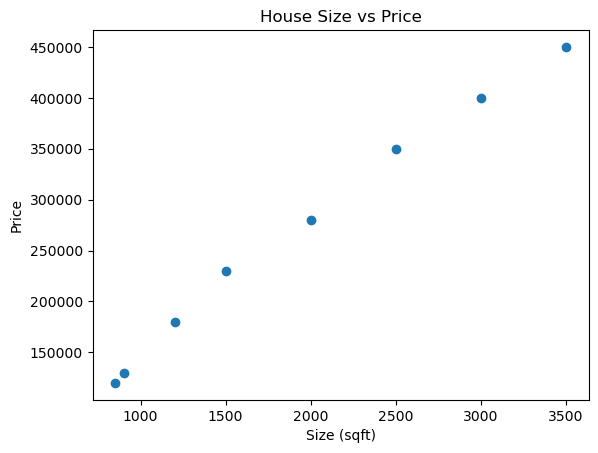

In [ ]:
print(df.describe())

# Plot Size vs Price
plt.scatter(df['Size_sqft'], df['Price'])
plt.xlabel('Size (sqft)')
plt.ylabel('Price')
plt.title('House Size vs Price')
plt.show()

In [ ]:
X = df['Size_sqft'].values
y = df['Price'].values

# Normalize features for faster convergence
X = (X - np.mean(X)) / np.std(X)


In [ ]:
# Hyperparameters
alpha = 0.01   # learning rate
epochs = 1000  # number of iterations

m = 0  # slope
c = 0  # intercept
n = len(X)

cost_history = []

for i in range(epochs):
    # Predicted values
    y_pred = m * X + c

    # Compute error
    error = y_pred - y

    # Cost function (Mean Squared Error)
    cost = (1/(2*n)) * np.sum(error**2)
    cost_history.append(cost)

    # Compute gradients
    dm = (1/n) * np.sum(error * X)
    dc = (1/n) * np.sum(error)

    # Update parameters
    m = m - alpha * dm
    c = c - alpha * dc

print("Trained parameters:")
print(f"m (slope) = {m}")
print(f"c (intercept) = {c}")

Trained parameters:
m (slope) = 115488.38374561256
c (intercept) = 267488.4516913176


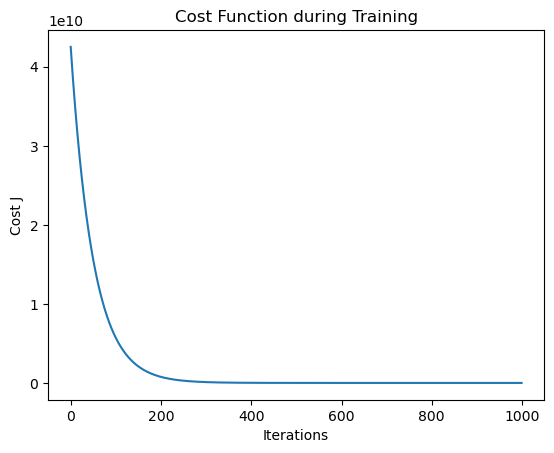

In [ ]:
plt.plot(range(epochs), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.title('Cost Function during Training')
plt.show()

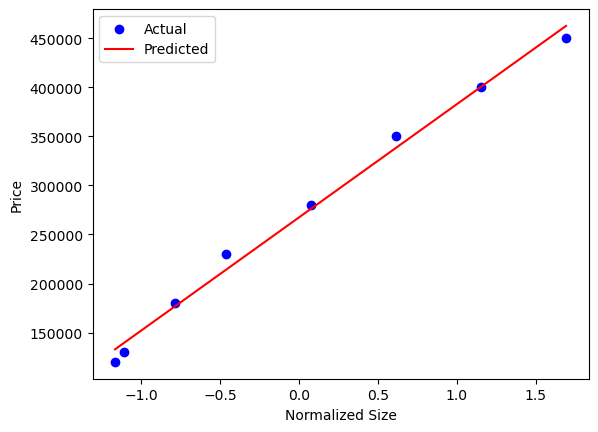

MSE: 105031704.68082292
R² Score: 0.9921873208977537


In [ ]:
# Predicted prices
y_pred = m * X + c

# Plot actual vs predicted
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Predicted')
plt.xlabel('Normalized Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R² Score:", r2)